# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

**Before starting with this lab, here is a quick reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating).**

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

<AxesSubplot:title={'center':'Training data ie 2017-2018 speeches'}>

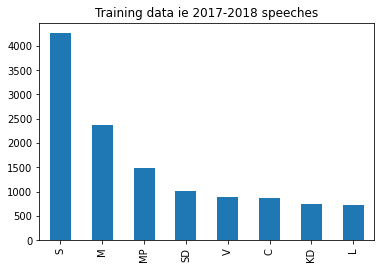

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
#% matplotlib inline
training_data['party'].value_counts().plot(kind='bar',title = "Training data ie 2017-2018 speeches")






<AxesSubplot:title={'center':'Test data ie 2018-2019 speeches'}>

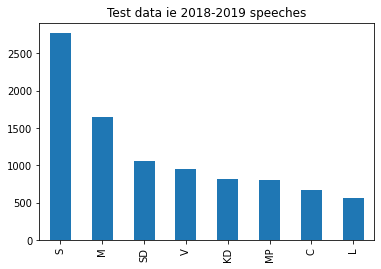

In [6]:
test_data['party'].value_counts().plot(kind='bar',title = "Test data ie 2018-2019 speeches")

*TODO: Enter your summary here*

We can see that in both train and test data , major chunk of speeches is given by party S. Party S and party M remains the top two in both sets. In both S and M there is a slight decrease in the number of speeches from train set to test set.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [7]:
# TODO: Write code here to train and evaluate a Multinomial Naive Bayes classifier

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
         
pipeline = Pipeline([
    ('vec', CountVectorizer()),
#    ('vec', TfidfVectorizer()),
    ('MNB', MultinomialNB())
])

pipeline.fit(training_data["words"], training_data["party"])

pred = pipeline.predict(test_data["words"])
print (classification_report(test_data["party"], pred))


              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

The computation was fast but we have accuracy of just 43% this is expected because here we assume all features to be independent.

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [8]:
# TODO: Write code here to evaluate the random baseline
from sklearn.dummy import DummyClassifier

pipeline = Pipeline([
    ('vec', CountVectorizer()),
    ('dummyclass', DummyClassifier(strategy="stratified"))
    #“stratified”: generates predictions by respecting the training set’s class distribution
])

pipeline.fit(training_data["words"], training_data["party"])

pred = pipeline.predict(test_data["words"])
print (classification_report(test_data["party"], pred))

              precision    recall  f1-score   support

           C       0.07      0.07      0.07       671
          KD       0.12      0.08      0.10       821
           L       0.06      0.06      0.06       560
           M       0.21      0.22      0.21      1644
          MP       0.09      0.12      0.10       809
           S       0.30      0.36      0.33      2773
          SD       0.13      0.10      0.11      1060
           V       0.09      0.06      0.07       950

    accuracy                           0.19      9288
   macro avg       0.13      0.13      0.13      9288
weighted avg       0.18      0.19      0.18      9288



An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [9]:
# TODO: Write code here to print the accuracy of the most frequent class baseline

pipeline = Pipeline([
    ('vec', CountVectorizer()),
    ('dummyclass', DummyClassifier(strategy="most_frequent"))
    #“stratified”: generates predictions by respecting the training set’s class distribution
])

pipeline.fit(training_data["words"], training_data["party"])

pred = pipeline.predict(test_data["words"])
print (classification_report(test_data["party"], pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.00      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.04      0.12      0.06      9288
weighted avg       0.09      0.30      0.14      9288



/courses/732A92/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/courses/732A92/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/courses/732A92/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy here is 30%

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [10]:
# TODO: Write code here to implement undersampling

min_count = training_data['party'].value_counts().min()
undersample_df = pd.DataFrame()
for i in parties:
    df = training_data[training_data["party"]==i].sample(n=min_count, replace = False)
    undersample_df = pd.concat([undersample_df,df])
    
pipeline = Pipeline([
    ('vec', CountVectorizer()),
#    ('vec', TfidfVectorizer()),
    ('MNB', MultinomialNB())
])

pipeline.fit(undersample_df["words"], undersample_df["party"])

pred = pipeline.predict(test_data["words"])
print (classification_report(test_data["party"], pred))



              precision    recall  f1-score   support

           C       0.28      0.44      0.34       671
          KD       0.29      0.39      0.34       821
           L       0.26      0.44      0.33       560
           M       0.41      0.48      0.44      1644
          MP       0.33      0.43      0.37       809
           S       0.80      0.31      0.45      2773
          SD       0.47      0.41      0.44      1060
           V       0.43      0.53      0.47       950

    accuracy                           0.41      9288
   macro avg       0.41      0.43      0.40      9288
weighted avg       0.50      0.41      0.42      9288



Though accuracy is lesser that 43% as in problem 1 , undersampling is prefered here.
This is because we had unbalanced data , and the predictor would be more biased towards the majority class.
Undersampling solves this problem.


*TODO: Enter the summary of your results here*

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

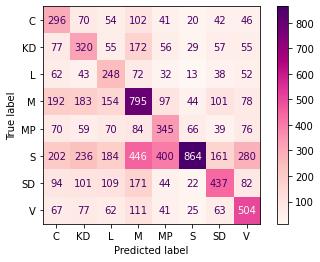

In [11]:
# TODO: Write code here to solve Problem 5
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, test_data['words'], test_data['party'],
                      display_labels=parties,cmap=plt.cm.RdPu);

Take a minute to reflect on whether your results make sense.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [12]:
# TODO: Write code here to implement the grid search
from sklearn.model_selection import GridSearchCV
params = {'vec__binary':[True,False], 
              'vec__ngram_range':[(1, 1), (1, 2)], # unigrams or bigrams
              'MNB__alpha':[1,0.1]}
pipeline = Pipeline([('vec', CountVectorizer()), ('MNB', MultinomialNB())])
gridsearch = GridSearchCV(estimator=pipeline, param_grid=params, 
                      scoring='accuracy', cv=5) 

gridsearch = gridsearch.fit(undersample_df['words'], undersample_df['party'])
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.6300428360971557
{'MNB__alpha': 0.1, 'vec__binary': True, 'vec__ngram_range': (1, 2)}


In [13]:
pred = gridsearch.predict(test_data['words'])
print(classification_report(test_data['party'], pred))

              precision    recall  f1-score   support

           C       0.32      0.44      0.37       671
          KD       0.33      0.39      0.36       821
           L       0.29      0.46      0.36       560
           M       0.45      0.46      0.45      1644
          MP       0.33      0.49      0.39       809
           S       0.76      0.44      0.56      2773
          SD       0.51      0.45      0.48      1060
           V       0.47      0.54      0.50       950

    accuracy                           0.46      9288
   macro avg       0.43      0.46      0.43      9288
weighted avg       0.51      0.46      0.47      9288



## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.

In [14]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('vec', TfidfVectorizer()),
    ('cls', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000))
])

params = {'vec__binary':[True,False], 
          'vec__ngram_range':[(1, 1), (1, 2)],
         }

gridsearch = GridSearchCV(pipeline, params, cv=5, n_jobs=-1)
gridsearch = gridsearch.fit(training_data['words'], training_data['party'])


print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.5578066566756796
{'vec__binary': True, 'vec__ngram_range': (1, 1)}


In [15]:
pred = gridsearch.predict(test_data['words'])
print(classification_report(test_data['party'], pred))

              precision    recall  f1-score   support

           C       0.65      0.18      0.29       671
          KD       0.80      0.09      0.17       821
           L       0.60      0.12      0.20       560
           M       0.44      0.57      0.49      1644
          MP       0.37      0.27      0.31       809
           S       0.47      0.89      0.61      2773
          SD       0.61      0.29      0.39      1060
           V       0.67      0.23      0.34       950

    accuracy                           0.48      9288
   macro avg       0.57      0.33      0.35      9288
weighted avg       0.54      0.48      0.42      9288



In [16]:
# TODO: Write code here to search for a better model and print the results
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vec', TfidfVectorizer()),
    ('cls',LinearSVC()),
])

params = {'vec__binary':[True,False], 
          'vec__ngram_range':[(1, 1), (1, 2)],
          'cls__C':(0.1, 0.001,0.005,0.5,1,1.5),
         }

gridsearch = GridSearchCV(estimator=pipeline, param_grid=params, 
                      scoring='accuracy', cv=5) 

gridsearch = gridsearch.fit(training_data['words'], training_data['party'])
print(gridsearch.best_score_)
print(gridsearch.best_params_)


0.6482203636272927
{'cls__C': 1.5, 'vec__binary': False, 'vec__ngram_range': (1, 2)}


In [17]:
pred = gridsearch.predict(test_data['words'])
print(classification_report(test_data['party'], pred))

              precision    recall  f1-score   support

           C       0.60      0.34      0.44       671
          KD       0.62      0.23      0.33       821
           L       0.58      0.30      0.40       560
           M       0.49      0.64      0.56      1644
          MP       0.43      0.38      0.40       809
           S       0.57      0.85      0.68      2773
          SD       0.64      0.45      0.53      1060
           V       0.69      0.38      0.49       950

    accuracy                           0.55      9288
   macro avg       0.58      0.45      0.48      9288
weighted avg       0.57      0.55      0.53      9288



Using count vectorizer is taking extremely long time to run linear SVC and logistic regression , so we have used tfidf above

## Reflection questions

The following reflection questions are questions that you could be asked in the oral exam. Try to answer each of them in the form of a short text and enter it in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 2.1:** Summarise the results of your experiments for Problem&nbsp;2. Are your results ‘good’ or ‘bad’? How do you determine that?

**RQ 2.2:** Summarise the results of your experiments for Problem&nbsp;4. Would you think that your results are typical even for other classification tasks? How would *oversampling* have looked like for this task? When would you use undersampling, when oversampling?

**RQ 2.3:** Which model performed best in your experiments for Problem&nbsp;6? Why is it important to do a hyperparameter search before drawing conclusions about the performance of a model? Why is it often not done, anyway? Why should you never tune hyperparameters on the test set?

*TODO: Enter your answers here*
RQ 2.1 : The computation was fast but we have accuracy of just 43% this is expected because here we assume all features to be independent. To see if the results are good or bad , we need to try out other classifiers and compare the results with them.

RQ 2.2 : Though accuracy is lesser that 43% as in problem 1 , undersampling is prefered here.
This is because we had unbalanced data , and the predictor would be more biased towards the majority class.
Undersampling solves this problem.
Incase of balanced data we can use oversampling.

RQ 2.3 : Linear SVC performed well when compared with other classifiers. Hyperparameter tuning is important because the behaviour of the choosen model depends on this and tuning typerparameters helps us get better results.
But hyperparameter tuning does not guarentee better results so it is not done always.
We should never tune hyperparameters on test data as we need the test set to be unseen data to check if the model generalizes well, for this purpose , this should not be used in tuning hyper parameters instead we need to use a part of training data as validation data of do cross validation 


**Congratulations on finishing L2! 👍**